Random Forest Classifier - Bagging
Multiple Trees


In [2]:
#import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#step 1:read the dataset
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#step2:check data qualities
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
#check missing values
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#Step 3:seperate x and y(Survived)
x = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'])
y = df[['Survived']]

In [8]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
x.value_counts()

Pclass  Sex     Age   SibSp  Parch  Fare     Embarked
3       male    17.0  0      0      8.6625   S           3
                19.0  0      0      7.8958   S           3
                32.0  0      0      7.9250   S           3
2       male    30.0  0      0      13.0000  S           3
                23.0  0      0      13.0000  S           3
                                                        ..
        female  31.0  1      1      26.2500  S           1
                32.0  0      0      13.0000  S           1
                32.5  0      0      13.0000  S           1
                33.0  0      2      26.0000  S           1
3       male    74.0  0      0      7.7750   S           1
Name: count, Length: 664, dtype: int64

In [11]:
y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

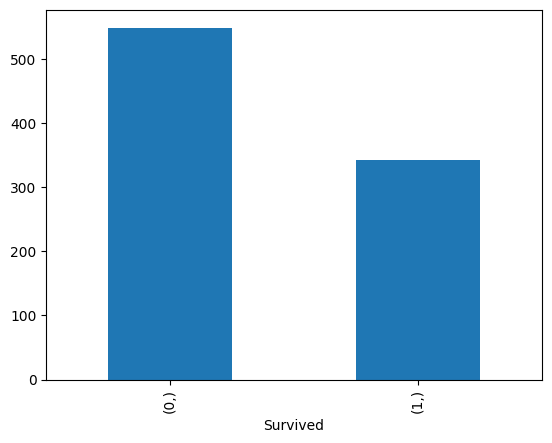

In [12]:
y.value_counts().plot(kind='bar')

In [13]:
#step 4:apply preprocessing on x
cat = list(x.columns[x.dtypes=='object'])
con = list(x.columns[x.dtypes!='object'])

In [14]:
cat

['Sex', 'Embarked']

In [15]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
from sklearn.pipeline import Pipeline #automated preprocessing
from sklearn.impute import SimpleImputer #replacing missing value
from sklearn.preprocessing import StandardScaler,OneHotEncoder #preprocessing
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [21]:
#Step 5: Train Test Split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2, random_state=42)

In [22]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [23]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [24]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [25]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [26]:
xtrain.shape #to check how many values are present

(712, 10)

In [27]:
xtest.shape

(179, 10)

In [28]:
#step 6:create random forest model building
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,max_depth=1,min_samples_split=5,min_samples_leaf=5,criterion='entropy')
model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [29]:
model1.score(xtrain,ytrain)

0.6657303370786517

In [30]:
model1.score(xtest,ytest)

0.6759776536312849

In [32]:
#Step 7:tune the hyperparameter.....we tune parameter boz we dont know what value we have to take
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5, 6],
          'min_samples_split':[2, 3, 4, 5, 6],
          'criterion':['gini', 'entropy']}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [34]:
rscv1.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'max_depth': 5,
 'criterion': 'entropy'}

In [35]:
rscv1.best_score_

0.807366931991778

In [36]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       n_estimators=200)

In [37]:
#Predict results for train and test
ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

In [38]:
ypred_train1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [40]:
ypred_test1[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [41]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [42]:
#Plot the confusion matrix for test
best_rfc.classes_

array([0, 1], dtype=int64)

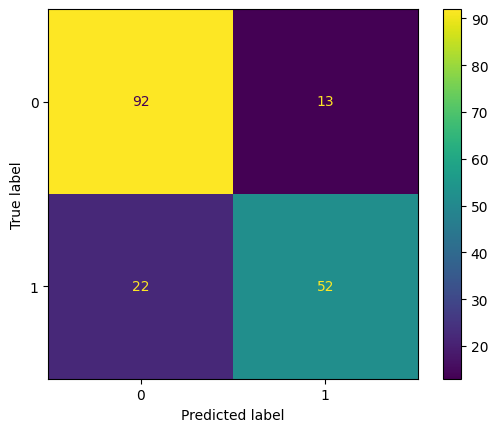

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test1)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [45]:
#Create Model 2- Gradient Boosting Model

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(n_estimators=1,
                                    learning_rate=0.3,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.3, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [47]:
model2.score(xtrain, ytrain)

0.6235955056179775

In [48]:
model2.score(xtest, ytest)

0.5865921787709497

In [49]:
#Hyperparameter Tuning of Gradient boost

In [50]:
params2 = {'n_estimators':[10, 50, 100, 200, 300],
           'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'max_depth':[1, 2, 3, 4, 5, 6],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [51]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [52]:
rscv2.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_depth': 2,
 'learning_rate': 0.1}

In [53]:
rscv2.best_score_

0.8060107911757044

In [54]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=2, min_samples_split=5)

In [55]:
best_gbc.score(xtrain, ytrain)

0.8693820224719101

In [56]:
best_gbc.score(xtest, ytest)

0.8100558659217877

In [57]:
#Predict results for train and test
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [58]:
ypred_train2[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [60]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [61]:
ypred_test2[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [62]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


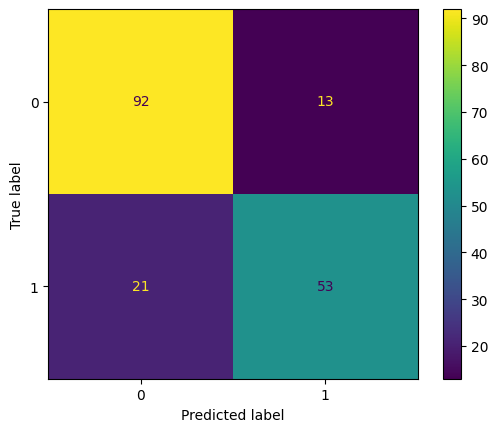

In [63]:
#Plot confusion matrix for Gradient Boost
cf2 = confusion_matrix(ytest, ypred_test2)
cfd2 = ConfusionMatrixDisplay(cf2, display_labels=best_gbc.classes_)
cfd2.plot()

In [64]:
#Print the classification report
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [65]:
#Gradient Boosting Model is slightly better Than Random Forest for given dataset
#Test

#Gradient Boosting - 81%

#Random Forest - 80%



In [66]:
#Step 8: out of sample prediction
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [68]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [69]:
#Predict results with Probability

In [70]:
preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)

In [71]:
preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [73]:
probs[0:5]

array([[0.85442552, 0.14557448],
       [0.26590681, 0.73409319],
       [0.81267521, 0.18732479],
       [0.87927475, 0.12072525],
       [0.4858516 , 0.5141484 ]])

In [74]:
prob_surv = probs[:,1]
prob_surv[0:5]

array([0.14557448, 0.73409319, 0.18732479, 0.12072525, 0.5141484 ])

In [75]:
#Save above results in a dataframe
df_results = xnew[['PassengerId']]
df_results

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [76]:
df_results['Survived_pred'] = preds 
df_results['Probability'] = prob_surv

In [77]:
df_results

,PassengerId,Survived_pred,Probability
0,892,0,0.145574
1,893,1,0.734093
2,894,0,0.187325
3,895,0,0.120725
4,896,1,0.514148
...,...,...,...
413,1305,0,0.120725
414,1306,1,0.956382
415,1307,0,0.115876
416,1308,0,0.120725


In [78]:
df_results['Survived_pred'].value_counts()

Survived_pred
0    282
1    136
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

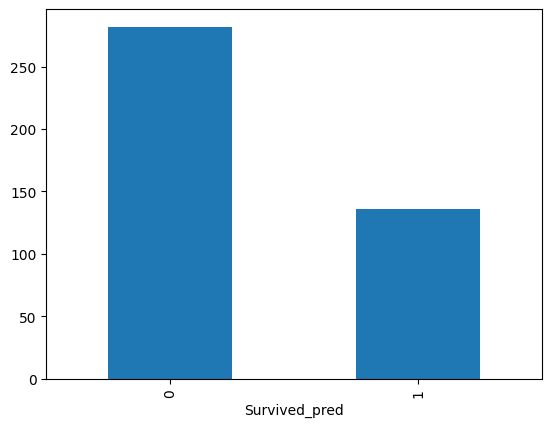

In [79]:
df_results['Survived_pred'].value_counts().plot(kind='bar')

In [80]:
df_results.to_csv('Results.csv', index=False)

In [81]:
#Feature importances
imp = best_gbc.feature_importances_
imp

array([0.17996176, 0.12172968, 0.03267826, 0.01265564, 0.08869845,
       0.1684283 , 0.38315484, 0.00415395, 0.        , 0.00853912])

In [82]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [83]:
imp = pd.Series(imp)
imp.index = xtrain.columns

In [84]:
imp.sort_values(ascending=False)

cat__Sex_male      0.383155
num__Pclass        0.179962
cat__Sex_female    0.168428
num__Age           0.121730
num__Fare          0.088698
num__SibSp         0.032678
num__Parch         0.012656
cat__Embarked_S    0.008539
cat__Embarked_C    0.004154
cat__Embarked_Q    0.000000
dtype: float64

<Axes: >

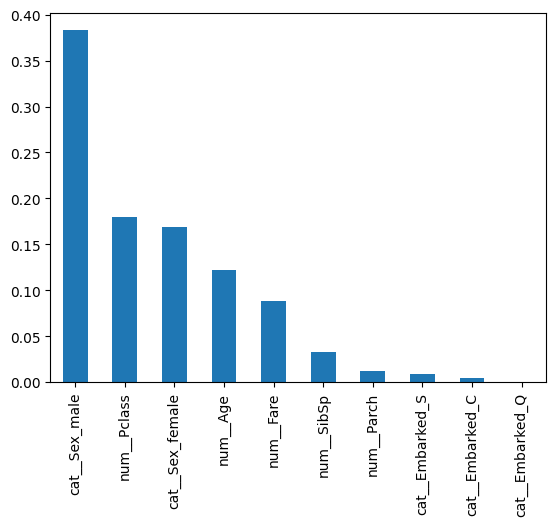

In [85]:
imp.sort_values(ascending=False).plot(kind='bar')

In [86]:
# For Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor